In [1]:
# Importing packages

import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns

In [2]:
# Importing the Dataset

data = pd.read_csv(r"E:\Python for Data Science and Machine Learning\bodyFitness.csv")
pd.set_option('display.max_columns', None)
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
# checking the datatypes

data.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [4]:
# checking the shape of the dataset

data.shape

(13393, 12)

In [5]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [6]:
# checking the unique values

data.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

In [7]:
# checking missing value

data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
# checking the correlation matrix

data.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight_kg', ylabel='Density'>

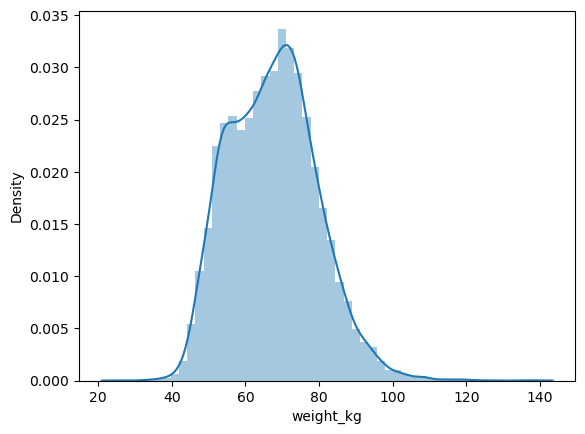

In [9]:
# checking the distribution

sns.distplot(data["weight_kg"])

<AxesSubplot:xlabel='height_cm', ylabel='Count'>

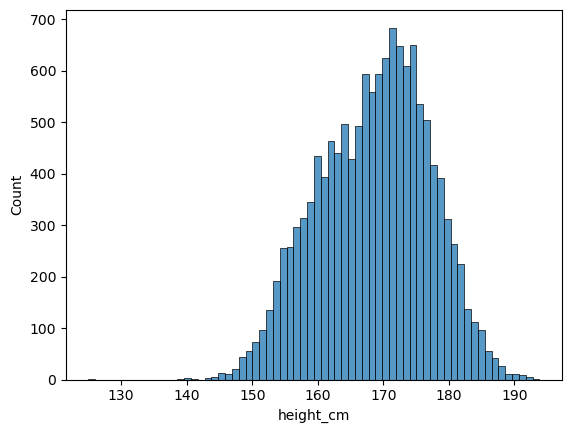

In [10]:
sns.histplot(data["height_cm"])

In [11]:
# dummy variables

data = pd.get_dummies(data=data, columns=['gender'],
drop_first=True)

In [12]:
y = data.loc[:, "class"]
X = data.drop("class",axis=1)

In [13]:
# splitting into train/test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
y,test_size =0.2,random_state=42)

In [14]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [17]:
# objective ='multi:softprob' for multiclass
# Python automatically takes it if not mentioned

classifier =XGBClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [18]:
y_pred

array([3, 0, 0, ..., 1, 0, 2], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[591  86   8   0]
 [135 424  85  18]
 [ 50 115 452  33]
 [  8  39  57 578]]


0.76334453154162

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[591  86   8   0]
 [135 424  85  18]
 [ 50 115 452  33]
 [  8  39  57 578]]
              precision    recall  f1-score   support

           A       0.75      0.86      0.80       685
           B       0.64      0.64      0.64       662
           C       0.75      0.70      0.72       650
           D       0.92      0.85      0.88       682

    accuracy                           0.76      2679
   macro avg       0.77      0.76      0.76      2679
weighted avg       0.77      0.76      0.76      2679



In [23]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.44 %
Standard Deviation: 1.32 %


In [24]:
xgbc

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
parameters = [{'learning_rate': [0.3, 0.5], 
'gamma': [0,.01,.02]}]

In [26]:
parameters = [{'learning_rate': [0.3], 
'max_depth': [2,3,4]}]

In [27]:
# shows total available CPUs

import multiprocessing
multiprocessing.cpu_count()

4

In [28]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
param_grid = parameters,scoring = 'accuracy', cv = 10, n_jobs = -1) # n_jobs = -1 will apply all CPUs

In [29]:
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 74.29 %
Best Parameters: {'learning_rate': 0.3, 'max_depth': 4}


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


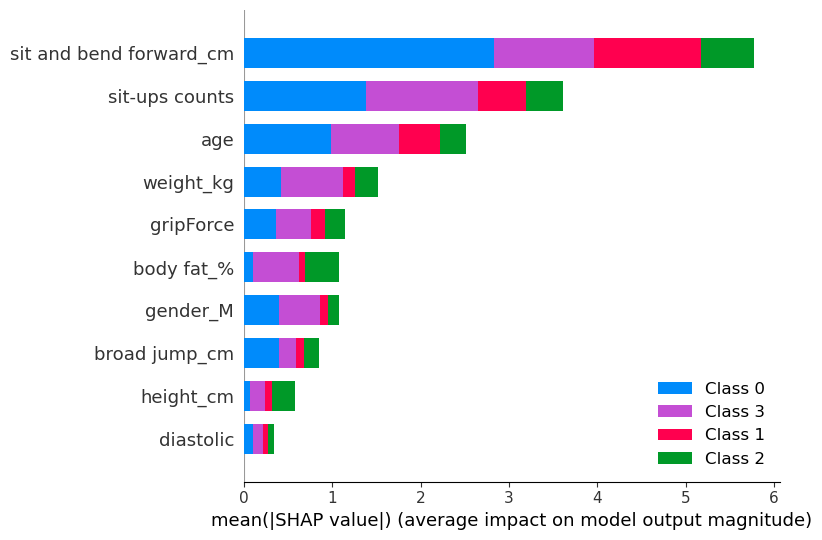

In [31]:
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)
feature_columns = X_test.columns
shap.summary_plot(shap_values, X_test, 
feature_names = feature_columns, max_display = 10)

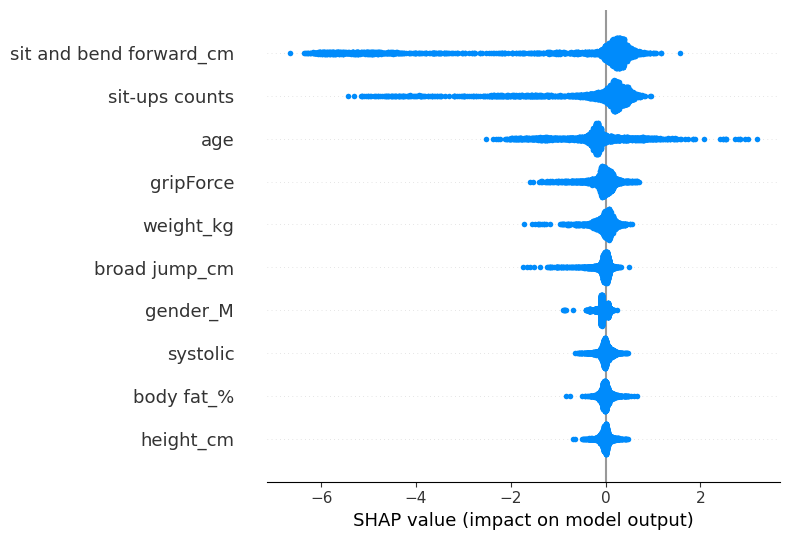

In [32]:
shap.summary_plot(shap_values[1], shap_values, 
feature_names = feature_columns,max_display = 10)